# GLM 負の二項分布

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrix

In [7]:
filepath = '../../../../../../data/processed/df_filtered_5years.xlsx'
df = pd.read_excel(filepath)
df = df.dropna()
df.head()

,island,year,island_id,region_code,region_name,prefecture_code,population,dummy_island_has_bridge,dummy_island_is_connected_mainland,year_bridge_opened,dummy_after_bridge_opened,year_connect_mainland,dummy_after_connect_mainland,income,prefecture_name,area_km2,distance_m
5,島後,2005,62,32528,隠岐の島町,32,17259.0,0.0,0.0,0.0,0.0,0.0,0.0,2030.888121,島根県,241.53,67840.0
6,島後,2010,62,32528,隠岐の島町,32,15930.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.990958,島根県,241.53,67840.0
7,島後,2015,62,32528,隠岐の島町,32,14901.0,0.0,0.0,0.0,0.0,0.0,0.0,1613.531700,島根県,241.53,67840.0
8,島後,2020,62,32528,隠岐の島町,32,13882.0,0.0,0.0,0.0,0.0,0.0,0.0,1686.173400,島根県,241.53,67840.0
10,中ノ島,1985,63,32525,海士町,32,3339.0,0.0,0.0,0.0,0.0,0.0,0.0,363.212405,島根県,32.29,49730.0


## define variables

In [14]:
population = df['population']
bridge = df['dummy_after_bridge_opened']
income = df['income']
log_income = np.log(income)
area = df['area_km2']
log_area = np.log(area)
distance = df['distance_m']
log_distance = np.log(distance)
density = population / area

X = dmatrix('bridge + log_income + log_area + log_distance + density + C(year)', data=df, return_type='dataframe')

# 過分散パラメータ
mean_population = np.mean(population)
var_population = np.var(population)

alpha = (var_population - mean_population) / mean_population**2

## Modeling

$$
Population = \lambda \\

\log\lambda = \beta_0 + \beta_1 Bridge + X^T \gamma\\
$$

In [15]:
y = population
X = sm.add_constant(X)

model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=alpha))
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             population   No. Observations:                  901
Model:                            GLM   Df Residuals:                      888
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7138.6
Date:                Tue, 22 Oct 2024   Deviance:                       56.439
Time:                        15:09:16   Pearson chi2:                     27.7
No. Iterations:                    31   Pseudo R-squ. (CS):             0.3821
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7236      1.348     

## 残差分析

In [16]:
residuals = results.resid_response

In [21]:
# 変数と残差の相関
coor_population = np.corrcoef(df['population'], residuals)[0, 1]
corr_bridge = np.corrcoef(df['dummy_after_bridge_opened'], residuals)[0, 1]
corr_log_income = np.corrcoef(log_income, residuals)[0, 1]
corr_area = np.corrcoef(log_area, residuals)[0, 1]
corr_distance = np.corrcoef(log_distance, residuals)[0, 1]
corr_density = np.corrcoef(density, residuals)[0, 1]

print(f'coor between population and residuals: {coor_population:.3f}')
print(f'coor between bridge and residuals: {corr_bridge:.3f}')
print(f'coor between log_income and residuals: {corr_log_income:.3f}')
print(f'coor between area and residuals: {corr_area:.3f}')
print(f'coor between distance and residuals: {corr_distance:.3f}')

coor between population and residuals: -0.328
coor between bridge and residuals: -0.089
coor between log_income and residuals: -0.061
coor between area and residuals: -0.053
coor between distance and residuals: 0.107


### 残差プロット

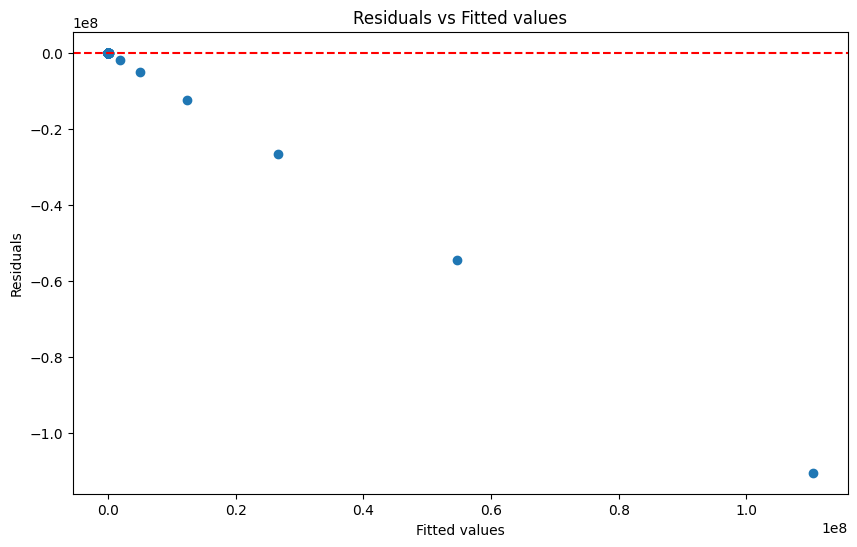

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, residuals)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

### 残差ヒストグラム

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.show()

KeyboardInterrupt: 